In [17]:
import numpy as np 
from matplotlib import pyplot as plt 

In [18]:
#Goal: Calculate the vacancy energy of an Si supercell 
#Procedure: 
#1. Construct supercell and determine lattice parameter through equation of states calculation
#2. Calculate E_sys+v energy through scf calculation of supercell 
#3. Remove an Si atom from the supercell and relax the geometry, determine E_sys
#4. Calculate E_lone of a lone Si atom in the supercell 
#5. Determine vacancy energy: E_v = E_sys+v + nE_lone - E_sys

In [19]:
#1. Determining the lattice Parameter 

In [27]:
%cd /home/jjauregui/Desktop/QE/Si/1.EOS/

/home/jjauregui/Desktop/QE/Si/1.EOS


 Lattice parameter is ~10.499999999999998 bohr


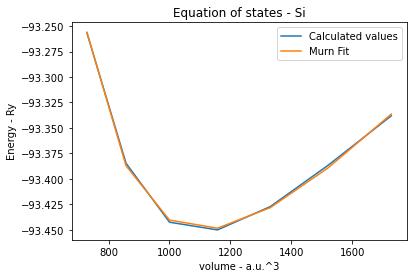

In [30]:
#Load Data
v = np.loadtxt('lat_E.dat',usecols=(0))
v = v**3
E = np.loadtxt('lat_E.dat',usecols=(1))

#Loading Murnaghan 
E_fit = np.loadtxt('murn_fit',usecols=(0))

#Plotting Data
plt.plot(v,E,label = "Calculated values")
#Plotting Murn
plt.plot(v,E_fit,label = "Murn Fit")

#Labels
plt.title("Equation of states - Si")
plt.xlabel("volume - a.u.^3")
plt.ylabel("Energy - Ry")
plt.legend()

#Minimization
print(" Lattice parameter is ~"+str((v[3])**(1/3))+" bohr")

In [7]:
cd ../2.SCF/

/home/jjauregui/Desktop/QE/Si/2.SCF


In [8]:
#2. Determining supercell energy E_sys+v
E_sys_v = -2523.23905938

In [9]:
#3. Determing E_sys after relaxation 
E_sys = -2476.25799303

In [10]:
#4. Determining E_lone in supercell 
E_lone = -46.33880589

In [11]:
#5. Final Calculation
E_delta = E_sys_v - E_sys
E_vacancy = E_delta - E_lone
print("Vacancy in Ry is "+str(E_vacancy)+" Ry")
E_ev = E_vacancy*13.6056980659
print("Vacancy energy in eV = "+str(E_ev)+" eV")

Vacancy in Ry is -0.642260460000216 Ry
Vacancy energy in eV = -8.738401898428982 eV


In [12]:
#Part 2, Vacancy energy of 4x4x4 supercell 
#Determine 4x4x4 positions. Si.pos.txt
#Redo steps 2-5 of supercell calculations 


In [13]:
#2-5 Realculate scf Energy 
E_sys4 = -5980.90874870
E_lone4 = -46.33337483
E_sys_lone = -5933.91789366
E_vacancy4 = (E_sys4-E_sys_lone) - E_lone4

E_ev4 = E_vacancy4*13.6056980659
print("Vacancy energy in eV = "+str(E_ev4)+" eV")

Vacancy energy in eV = -8.945477221558956 eV


In [14]:
#Repeat Calculation for 5x5x5 Supercell using K_POINTS Gamma 
E_sysG = -11680.87325147
E_loneG = -46.33835926
E_sys_loneG = -11633.89313817
E_vacancyG = (E_sysG -E_sys_loneG) - E_loneG

E_evG = E_vacancyG*13.6056980659
print("Vacancy energy in eV = "+str(E_evG)+" eV")

Vacancy energy in eV = -8.731511700812701 eV


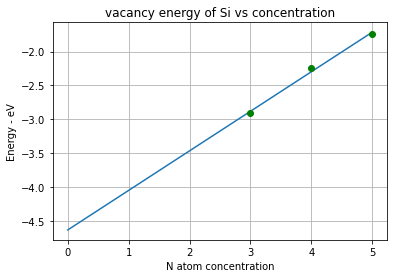

Energy at low concentrations is -4.631487344748221 eV


In [15]:
#Determing Energy at low concentration
x = [3, 4, 5]
y = [E_ev/3, E_ev4/4, E_evG/5]

# Calculate the coefficients. This line answers the initial question. 
coefficients = np.polyfit(x, y, 1)

# Let's compute the values of the line...
polynomial = np.poly1d(coefficients)
x_axis = np.linspace(0,5,100)
y_axis = polynomial(x_axis)

# ...and plot the points and the line
plt.plot(x_axis, y_axis)
plt.plot( x[0], y[0], 'go' )
plt.plot( x[1], y[1], 'go' )
plt.plot( x[2], y[2], 'go')
plt.grid('on')
plt.xlabel("N atom concentration")
plt.ylabel("Energy - eV")
plt.title("vacancy energy of Si vs concentration")
plt.show()

print("Energy at low concentrations is "+str(coefficients[1])+" eV")